# Predicción de Cancer de mama


### Objetivo
Usaremos un flujo de trabajo ML para diagnosticar el cáncer como benigno (no se expande al resto del cuerpo) o maligno (se expande al resto del cuerpo). La idea es proporcionar un detección temprana del cancer para evitar su expansión

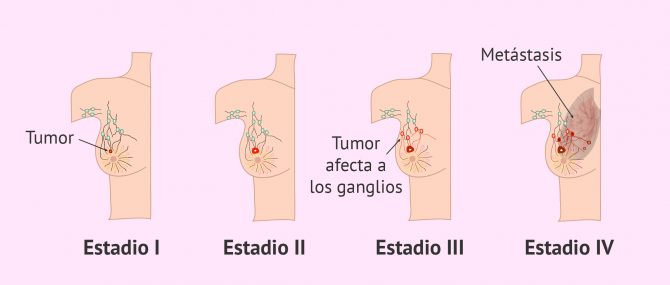

Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

La idea de la primera clase es aprender a realizar una exploración exhaustiva de los datos. Posteriormente se aprenderá a aplicar técnicas de selección de características. De evaluará el/los modelos aplicando y sin aplicar técnicas de Feature Selection y compararemos resultados.

## Preparar entorno de trabajo

### Crear entorno virtual (Conda/Python env)

Una vez creado activamos el entorno con 'conda activate myentorno' para instalar la librerías necesarias

### Instalamos las librerías necesarias

Para instalar las librerías podemos hacerlo mediante "pip install" o "conda install"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Paso 1: Adquisición de los datos

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [4]:
# Observación de todos los elementos del dataset
# display(breast_cancer)

In [5]:
# Elementos del dataset
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(breast_cancer.DESCR[27:3130])


Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Rad

In [7]:
# Observación de variables target
# print(breast_cancer.data)
# print(breast_cancer.target)
print(breast_cancer.target_names)

['malignant' 'benign']


In [8]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(breast_cancer.filename)
print(breast_cancer.data_module)

### Lectura de los datos
Crearemos un dataframe y lo rellenaremos con cada una de las "features" del dataset

In [9]:
# cargamos los datos en un dataframe 
df_features = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
# Obtenemos información general del dataset
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Lectura de la variable "target"

In [11]:
# 1 - Benigno
# 0 - Maligno
df_target = pd.DataFrame(breast_cancer.target, columns=['target'])
df_target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [12]:
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

Según la descripción del conjunto de datos, la distribución de la variable objetivo es: 212 - Maligno, 357 - Benigno. Por lo tanto, "benign" y "maglinant" se presentan como 1 y 0, respectivamente.

Para empezar a trabajar concatenamos ambos dataframes: características (Features) y variable objetivo (target)

In [13]:
df = pd.concat([df_features, df_target], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Exploración de los datos

Antes de comenzar con la exploración de los datos vamos a asignarle nombre a la variable "target". Por lo tanto, indicaremos que:
- target = 1 (benigno) 
- target = 0 (maligno)

In [17]:
# Podríamos añadir una nueva columna categórica como hicimos en el análisis de supervivencia
# df.loc[data.target == 1, 'cancer'] = "Malignant"
# df.loc[data.target == 0, 'cancer'] = "Benign"

df['target'] = df['target'].apply(lambda x: "Benign"
                                  if x == 1 else "Malignant")
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [14]:
# Obtenemos información adicional sobre el conjunto de datos
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [18]:
df['target']

0      Malignant
1      Malignant
2      Malignant
3      Malignant
4      Malignant
         ...    
564    Malignant
565    Malignant
566    Malignant
567    Malignant
568       Benign
Name: target, Length: 569, dtype: object

In [19]:
df_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


#### Distribución de la variable objetivo mediante histograma

AxesSubplot(0.125,0.125;0.775x0.755)
Benign       357
Malignant    212
Name: target, dtype: int64


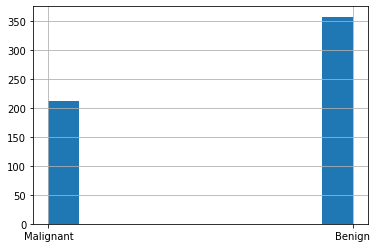

In [20]:
print(df["target"].hist())
print(df['target'].value_counts())

Como ya hemos visto antes, la distribución de la variable objetivo es: 
- 212 - Maligno, 
- 357 - Benigno. 

Para visualizar la distribución de los datos mejor utilizaremos la librería seaborn

Text(0.5, 1.0, 'Distribución de la diagnosis')

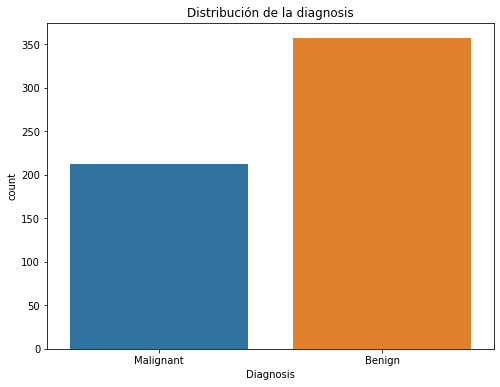

In [21]:
# set_style nos permite cambiar los colores de nuestras gráficas (mirar la documentación)
# sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(df['target'])
plt.xlabel("Diagnosis")
plt.title("Distribución de la diagnosis")

### Distribución de características

Ahora echaré un vistazo a la distribución de cada característica y veré en qué se diferencian entre 'benigno' y 'maligno'. Para ver la distribución de múltiples variables, podemos usar el diagrama de violín, el diagrama de enjambre o el diagrama de caja. 
Vamos a probar cada una de estas técnicas.

#### ¡OJO! ESTANDARIZAR LOS DATOS
Para visualizar distribuciones de múltiples características en una figura, primero necesito estandarizar los datos:

In [22]:
from sklearn.preprocessing import StandardScaler

# Estandarizamos solo las características (features) del dataset
# Si tuviesemos que estandarizar también nuestra variable target se haría por separado
scaler = StandardScaler()
scaler.fit(df_features)
features_scaled = scaler.transform(df_features)

# Concatenamos de nuevo nuestras características estandarizadas con la variable target que queremos predecir
features_scaled = pd.DataFrame(data=features_scaled,
                               columns=df_features.columns)

df_scaled = pd.concat([features_scaled, df['target']], axis=1)

Ahora podemos observar que nuestros datos han sido escalados correctamente

In [23]:
df_scaled.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,Malignant
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,Malignant
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,Malignant


In [ ]:
df_scaled.describe()

Cabe destacar que ahora todas las columnas (features) estan comprendidas en un mismo rango de valoresc

Antes de visualizar vamos a crear un dataframe para que nos sea mas fácil el manejo de los datos para la visualización.

Vamos a utilizar la función pandas.melt(). Esta función es útil para transformar un DataFrame en un formato en el que una o más columnas son variables de identificación (id_vars), mientras que todas las demás columnas, serán consideradas variables de características.

In [24]:
df_scaled_melt = pd.melt(df_scaled, id_vars='target',
                         var_name='features', value_name='value')
df_scaled_melt.head(3)

,target,features,value
0,Malignant,mean radius,1.097064
1,Malignant,mean radius,1.829821
2,Malignant,mean radius,1.579888


Para observar la distribución de los datos vamos a crear tres visualizaciones distintas (aunque con una sería suficiente, el uso de más gráficas de distribución de variables nos puede proporcionar información adicional):
- BOX PLOT:  es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana y los cuartiles de los datos, y también pueden representarse sus valores atípicos. 
VEASE (https://es.wikipedia.org/wiki/Diagrama_de_caja) para la interpretación del diagrama de cajas
- SWARM PLOT: Un diagrama de enjambre es otra forma de trazar la distribución de un atributo o la distribución conjunta de un par de atributos.
- VIOLIN PLOT: Los diagramas de violín son similares a los diagramas de caja (box plot), excepto que también muestran la densidad de probabilidad de los datos en diferentes valores. Estos gráficos incluyen un marcador para la mediana de los datos y un cuadro que indica el rango intercuartílico, como en los gráficos de caja estándar. En este diagrama de caja se superpone una estimación de la densidad del núcleo. Al igual que los diagramas de caja, los diagramas de violín se utilizan para representar la comparación de una distribución variable (o distribución de muestra) entre diferentes "categorías".


Como hay 30 características en nuestro dataset utlizaremos 10 para cada uno de los tipos de visualizaciones que hemos expuesto.
 

In [25]:
def violin_plot(features, name):
    """
    This function creates violin plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='features',
                   y='value',
                   hue='target',
                   data=data,
                   split=True,
                   inner="quart")
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Características")
    plt.ylabel("Datos estandarizados")


def swarm_plot(features, name):
    """
    This function creates swarm plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.swarmplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Características")
    plt.ylabel("Datos estandarizados")


def box_plot(features, name):
    """
    This function creates box plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Características")
    plt.ylabel("Datos estandarizados")

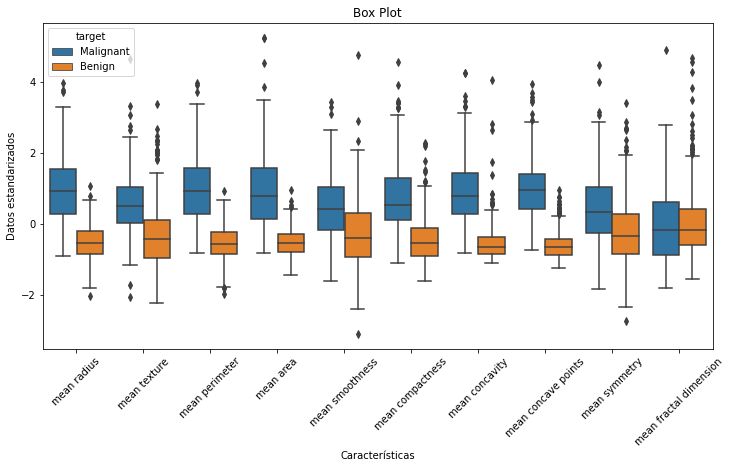

In [26]:
# Visualizamos la distribución de las diez primeras características
box_plot(df.columns[0:10], "Box Plot")

/home/eric/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eric/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eric/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eric/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

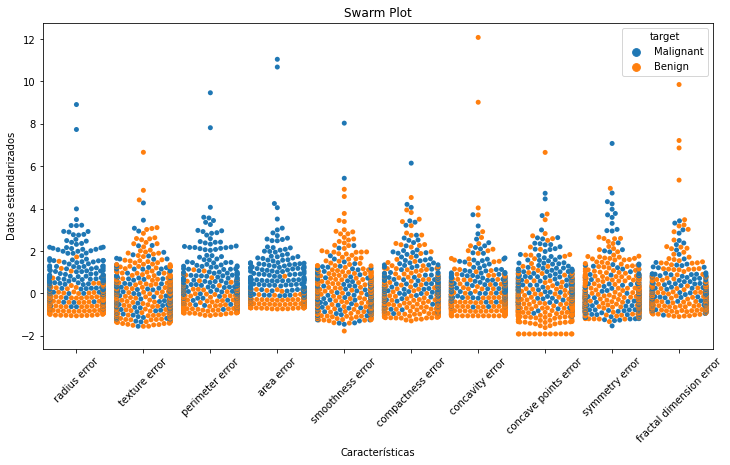

In [27]:
swarm_plot(df.columns[10:20], "Swarm Plot")

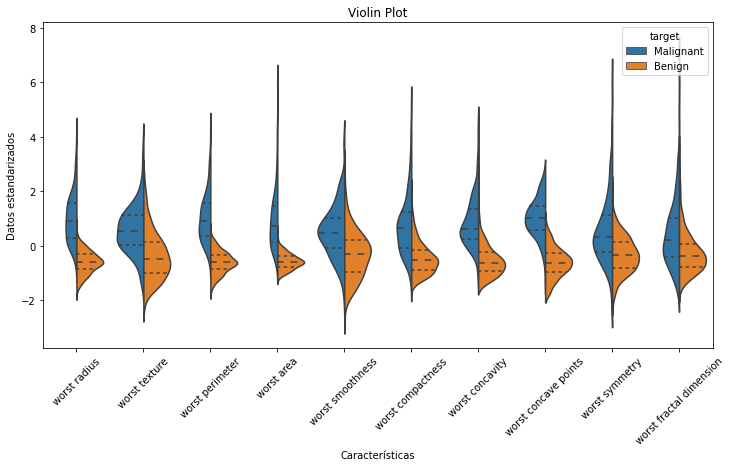

In [28]:
violin_plot(df.columns[20:30], "Violin Plot")

De los gráficos anteriores, podemos extraer algunas ideas de los datos:

- La mediana de algunas características es muy diferente entre "malignas" y "benignas". Esta separación se puede ver claramente en los diagramas de caja. Pueden ser muy buenas características para la clasificación. Por ejemplo:mean radius, mean area, mean concave points, worst radius, worst perimeter, worst area, worst concave points.
- Sin embargo, hay distribuciones que parecen similares entre "maligno" y "benigno". Por ejemplo:  mean smoothness, mean symmetry, mean fractual dimension, smoothness error. Por lo tanto, estas características no nos proporcionarán mucha ayuda en la tarea de clasificación.
- Otras características tienen distribuciones similares, por lo que pueden estar altamente correlacionadas entre sí. Por ejemplo: mean perimeter vs. mean area, mean concavity vs. mean concave points y  worst symmetry vs. worst fractal dimension. Por lo tanto, quizás no deberíamos incluir estas variables altamente correlacionadas.

###  Correlación entre variables

Como se ha observado anteriormente, algunas variables en el conjunto de datos pueden estar altamente correlacionadas entre sí. Exploremos la correlación de los tres ejemplos anteriores.

In [29]:
def correlation(var):
    """
    1. Print correlation
    2. Create jointplot
    """
    # Print correlation
    print("Correlation: ", df[[var[0], var[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(df[(var[0])], df[(var[1])], kind='reg')

Correlation:  0.9865068039913907


<Figure size 432x432 with 0 Axes>

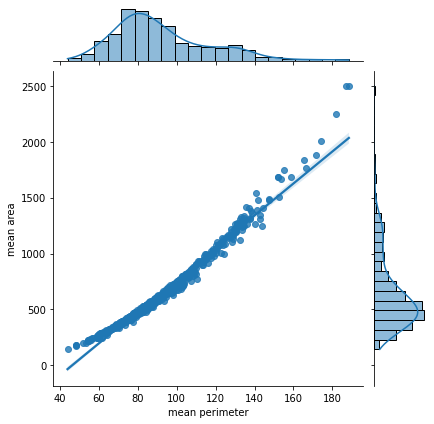

In [30]:
correlation(['mean perimeter', 'mean area'])

Correlation:  0.9213910263788588


<Figure size 432x432 with 0 Axes>

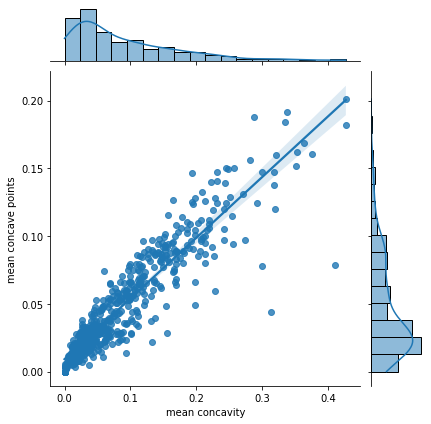

In [31]:
correlation(['mean concavity', 'mean concave points'])

Correlation:  0.537848206253609


<Figure size 432x432 with 0 Axes>

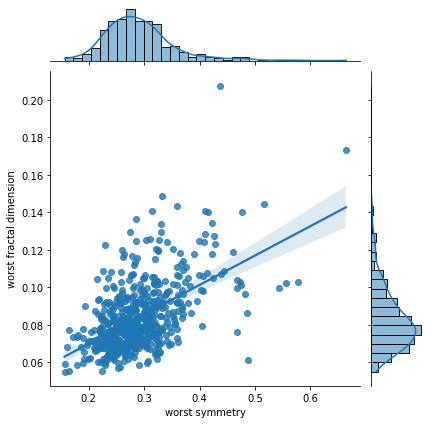

In [32]:
correlation(['worst symmetry', 'worst fractal dimension'])

Dos de los tres conjuntos de variables estan altamente correlados. Una correlación mayor al 90%

Para ver si existe mas correlaciones entre variables podemos hacer un estudio genérico de todas las variables mediante un mapa de calor que nos proporcionará la correlación de todas con todas.

/tmp/ipykernel_11866/4092667125.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat, dtype=np.bool)


<AxesSubplot:>

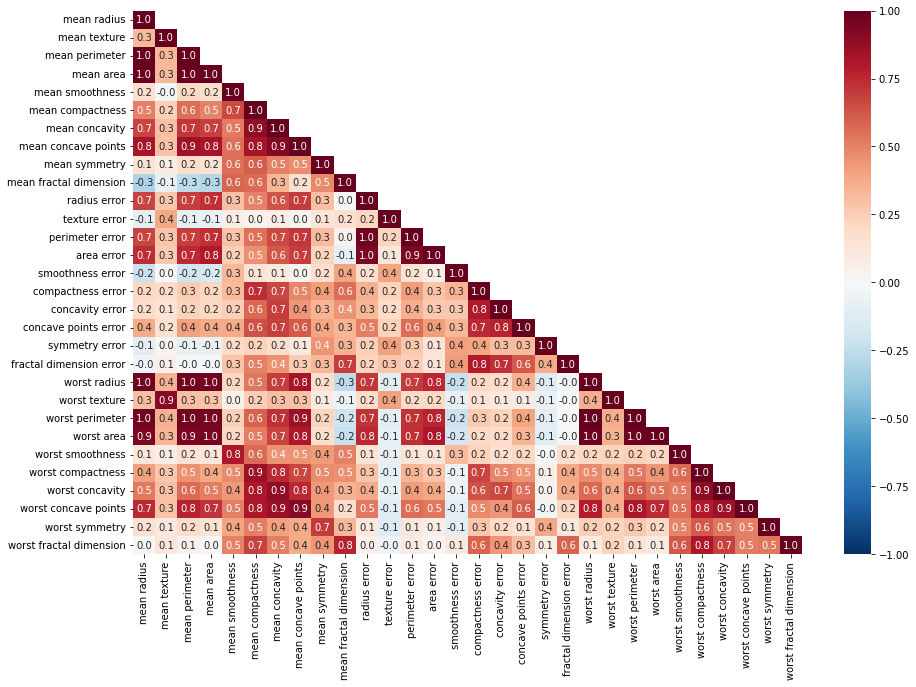

In [35]:
# Creamos la matriz de correlaciones
corr_mat = df.corr()

# # Plot heatmap
# plt.figure(figsize=(15, 10))
# sns.heatmap(corr_mat, annot=True, fmt='.1f',
#             cmap='RdBu_r', vmin=-1, vmax=1)

# Podemos crear una máscara para visualizar la mirad del mapa de correlaciones.
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,mask=mask)



En el mapa de calor, podemos ver que muchas variables en el conjunto de datos están altamente correlacionadas. 

Podemos poner un valor umbral para ver qué variables tienen una correlación mayor a un 70% por ejemplo

<AxesSubplot:>

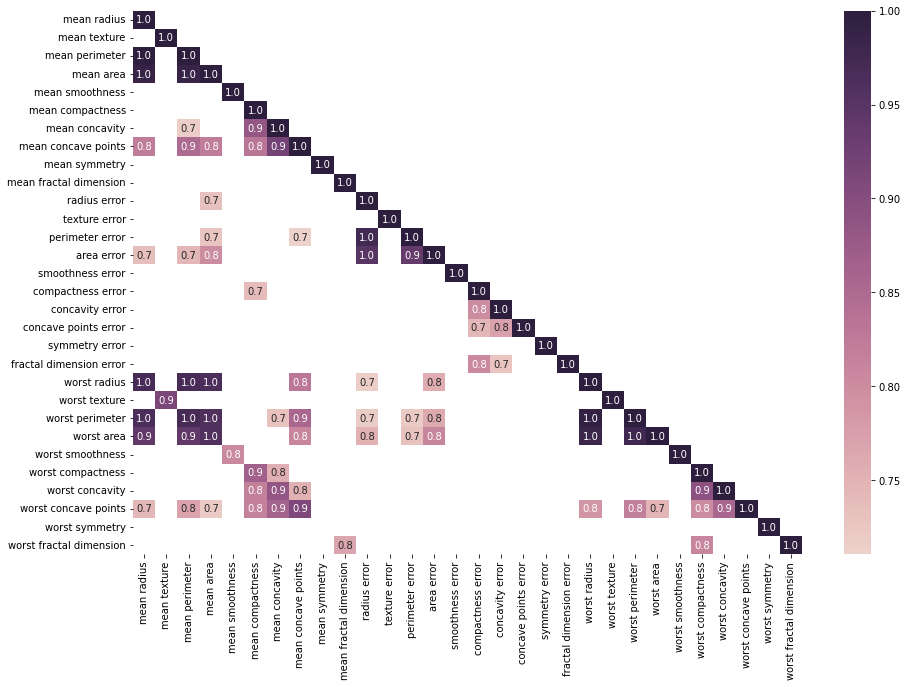

In [36]:
# plt.figure(figsize=(15, 10))
# sns.heatmap(corr_mat[corr_mat > 0.5], annot=True, fmt='.1f'
#             ,cmap=sns.cubehelix_palette(200))

# Si hemos declarado la mascara podemos visualizarlo con mask
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.7], annot=True, fmt='.1f'
            ,cmap=sns.cubehelix_palette(200), mask=mask)

Podemos observar que tenemos muchas variables correlacionadas entre sí. Por lo tanto, podremos aplicar algún algoritmo de selección de variables.

## Paso 2: Preprocesamiento de los datos

Comprobamos si los datos necesitan ser pre-procesados. 

Ahora necesitaríamos estandarizar nuestros datos antes de comenzar a trabajar pero ya lo hemos hecho previamente para visualizar los datos correctamente

In [ ]:
df.isna().sum()

¡POR SUERTE! 
Los datos han sido limpiados y pre-procesados previamente por lo que podemos saltarnos este paso

## Paso 3: Preparar los datos

In [37]:
from sklearn.model_selection import train_test_split
X = df_features
y = df_target['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [38]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


## Paso 4: Selección del modelo

Estamos viendo un caso de uso de clasificación binaria [0:maligno, 1:benigno]. Por lo tanto, debemos de elegir algún algoritmo de clasificación para implementar nuestro modelo. 

Lo primero y más importante para elegir con éxito el algoritmo que más se adapta a nuestras necesidades es:

- Determinar qué queremos conseguir
- Ver qué datos disponemos

Una vez que se tienen claros estos dos puntos y conociendo los algoritmos de machine learning existentes, podremos escoger el que mejor se adapte a nuestras necesidades. Sin embargo, suponiendo que no hemos trabajado nunca en un caso de uso similar probaremos una batería de algoritmos ML y los compararemos para ver cuál de ellos no ofrece mejores resultados en este caso.

Algunos de los algoritmos ML más comunes para clasificación:

- Decision Tree/Random Forest
- K Nearest Neighbor
- Naive Bayes
- Support Vector Machine
- Logistic Regression




### Random Forest Classification

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

## Paso 5:  Evaluación del modelo

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 62   5]
 [  3 118]]


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.96      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



accuracy, recall, f1-score es aproximadamente un  95%. 

Se puede observar en la matriz de confusión que el modelo solo ha fallado en 9 predicciones

## Para hacer en clase

- Podemos probar a entrenar el mismo modelo pero ahora con los datos estandarizados para ver si el modelo es capaz de extraer así mejor las características
- Podemos variar los parámetros de Random Forest para ver como varían los resultados
- Variar el split en el conjunto de entrenamiento y de prueba y ver cómo varían los resultados.
- Probar nuevas métricas para evaluar los resultados